In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = '../data'
files = [file for file in os.listdir(path) if not file.startswith('.')] #ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + '/' + file)
    all_months_data = pd.concat([all_months_data, current_data])

all_months_data.to_csv(path + '/' + 'all_data_copy.csv', index=False)

In [3]:
all_data = pd.read_csv('../data/all_data_copy.csv')
display(all_data.head())
print(all_data.shape)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"


(186850, 6)


Data Cleaning

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())
print(nan_df.shape)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
282,NaN,NaN,NaN,NaN,NaN,NaN
509,NaN,NaN,NaN,NaN,NaN,NaN
838,NaN,NaN,NaN,NaN,NaN,NaN
888,NaN,NaN,NaN,NaN,NaN,NaN
1169,NaN,NaN,NaN,NaN,NaN,NaN


(545, 6)


In [5]:
all_data = all_data.dropna(how='all')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [6]:
all_data['Order ID'] = all_data['Order ID'].str.strip() 
filtered_order_id = all_data[all_data['Order ID'].str.contains(r'[^0-9]', na=False)]


In [7]:
filtered_order_id

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
521,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
833,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2180,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2388,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
4248,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
all_data = all_data[~all_data['Order ID'].str.contains(r'[^0-9]', na=False)]
all_data['Order ID'] = all_data['Order ID'].astype(int)
all_data

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\2221004905.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order ID'] = all_data['Order ID'].astype(int)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001"
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001"
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001"
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001"
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
all_data['Product'] = all_data['Product'].astype(str)
all_data['Product'] = all_data['Product'].str.strip()
unique_product = all_data['Product'].unique()
unique_product

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\3367170600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Product'] = all_data['Product'].astype(str)


C:\Users\junai\AppData\Local\Temp\ipykernel_9120\3367170600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Product'] = all_data['Product'].str.strip()


array(['34in Ultrawide Monitor', '27in 4K Gaming Monitor',
       'AAA Batteries (4-pack)', '27in FHD Monitor', 'Wired Headphones',
       'Lightning Charging Cable', 'Apple Airpods Headphones',
       'USB-C Charging Cable', '20in Monitor', 'iPhone',
       'Bose SoundSport Headphones', 'ThinkPad Laptop',
       'AA Batteries (4-pack)', 'Google Phone', 'Vareebadd Phone',
       'Flatscreen TV', 'Macbook Pro Laptop', 'LG Dryer',
       'LG Washing Machine'], dtype=object)

In [10]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].str.strip() 
filtered_order_quantity = all_data[all_data['Quantity Ordered'].str.contains(r'[^0-9]', na=False)]
filtered_order_quantity.shape

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\758333084.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].str.strip()


(0, 6)

In [11]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(str)
unique_order_quantity = all_data['Quantity Ordered'].unique()
unique_order_quantity

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\2730500820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(str)


array(['1', '2', '3', '4', '5', '8', '6', '7', '9'], dtype=object)

In [12]:
all_data['Price Each'] = all_data['Price Each'].str.strip()
filtered_price_each = all_data[all_data['Price Each'].str.contains(r'[^0-9\.]', na=False)]

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\160815984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].str.strip()


In [13]:
filtered_price_each.shape

(0, 6)

In [14]:
all_data['Price Each'] = all_data['Price Each'].astype(float)
unique_price_each = all_data['Price Each'].unique()
unique_price_each

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\2458746694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Price Each'] = all_data['Price Each'].astype(float)


array([ 379.99,  389.99,    2.99,  149.99,   11.99,   14.95,  150.  ,
         11.95,  109.99,  700.  ,   99.99,  999.99,    3.84,  600.  ,
        400.  ,  300.  , 1700.  ])

In [15]:
all_data['Order_Date_Month'] = all_data['Order Date'].str[0:2]
all_data['Order_Date_Day'] = all_data['Order Date'].str[3:5]
all_data['Order_Date_Year'] = all_data['Order Date'].str[6:8]
all_data

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\4145318722.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order_Date_Month'] = all_data['Order Date'].str[0:2]
C:\Users\junai\AppData\Local\Temp\ipykernel_9120\4145318722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order_Date_Day'] = all_data['Order Date'].str[3:5]
C:\Users\junai\AppData\Local\Temp\ipykernel_9120\4145318722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,28,19
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,28,19
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,24,19
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,14,19
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,07,19
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,17,19
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,01,19
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,23,19
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,19,19


In [16]:
unique_order_date_month = all_data['Order_Date_Month'].unique()
unique_order_date_month

array(['10', '11', '12', '01', '02', '03', '04', '05', '06', '07', '08',
       '09'], dtype=object)

In [17]:
unique_order_date_day = all_data['Order_Date_Day'].unique()
unique_order_date_day

array(['28', '24', '14', '07', '01', '29', '20', '16', '13', '26', '17',
       '31', '10', '12', '23', '18', '09', '19', '25', '08', '22', '15',
       '30', '21', '03', '05', '06', '02', '11', '04', '27'], dtype=object)

In [18]:
unique_order_date_year = all_data['Order_Date_Year'].unique()
unique_order_date_year

array(['19', '20'], dtype=object)

In [19]:
all_data['Order_Date_Month'] = all_data['Order_Date_Month'].astype(int)
all_data['Order_Date_Day'] = all_data['Order_Date_Day'].astype(int)
all_data['Order_Date_Year'] = all_data['Order_Date_Year'].astype(int)
all_data['Order_Date_Year'] = all_data['Order_Date_Year'] + 2000
all_data


C:\Users\junai\AppData\Local\Temp\ipykernel_9120\366250572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order_Date_Month'] = all_data['Order_Date_Month'].astype(int)
C:\Users\junai\AppData\Local\Temp\ipykernel_9120\366250572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order_Date_Day'] = all_data['Order_Date_Day'].astype(int)
C:\Users\junai\AppData\Local\Temp\ipykernel_9120\366250572.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,28,2019
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,28,2019
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,24,2019
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,14,2019
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,7,2019
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,17,2019
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,23,2019
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,19,2019


In [20]:
all_data['Order_Date_Only'] = pd.to_datetime(
    dict(
        year=all_data['Order_Date_Year'],
        month=all_data['Order_Date_Month'],
        day=all_data['Order_Date_Day']
        
    ),
    errors='coerce'
)
all_data

C:\Users\junai\AppData\Local\Temp\ipykernel_9120\3814100571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['Order_Date_Only'] = pd.to_datetime(


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order_Date_Only
0,259358,34in Ultrawide Monitor,1,379.99,10/28/19 10:56,"609 Cherry St, Dallas, TX 75001",10,28,2019,2019-10-28
1,259359,27in 4K Gaming Monitor,1,389.99,10/28/19 17:26,"225 5th St, Los Angeles, CA 90001",10,28,2019,2019-10-28
2,259360,AAA Batteries (4-pack),2,2.99,10/24/19 17:20,"967 12th St, New York City, NY 10001",10,24,2019,2019-10-24
3,259361,27in FHD Monitor,1,149.99,10/14/19 22:26,"628 Jefferson St, New York City, NY 10001",10,14,2019,2019-10-14
4,259362,Wired Headphones,1,11.99,10/07/19 16:10,"534 14th St, Los Angeles, CA 90001",10,7,2019,2019-10-07
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,17,2019,2019-09-17
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,2019-09-01
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,23,2019,2019-09-23
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,19,2019,2019-09-19


In [21]:
all_data_df = all_data.drop(['Order Date'], axis=1) 
all_data_df = all_data_df.rename(columns ={'Order_Date_Only': 'Order Date'})
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",10,28,2019,2019-10-28
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",10,28,2019,2019-10-28
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",10,24,2019,2019-10-24
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",10,14,2019,2019-10-14
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",10,7,2019,2019-10-07
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,17,2019,2019-09-17
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,2019-09-01
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,23,2019,2019-09-23
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,19,2019,2019-09-19


In [22]:
all_data_df['Purchase Address'] = all_data_df['Purchase Address'].str.strip()
all_data_df['Zip Code'] = all_data_df['Purchase Address'].str[-5:]
all_data_df['Zip Code'] = all_data_df['Zip Code'].astype(int)
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Zip Code
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",10,28,2019,2019-10-28,75001
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",10,28,2019,2019-10-28,90001
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",10,24,2019,2019-10-24,10001
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",10,14,2019,2019-10-14,10001
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",10,7,2019,2019-10-07,90001
...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,17,2019,2019-09-17,90001
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,2019-09-01,94016
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,23,2019,2019-09-23,94016
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,19,2019,2019-09-19,94016


In [23]:
all_data_df[['Address', 'City', 'State']] = all_data_df['Purchase Address'].str.split(', ', expand=True)
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Zip Code,Address,City,State
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",10,28,2019,2019-10-28,75001,609 Cherry St,Dallas,TX 75001
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",10,28,2019,2019-10-28,90001,225 5th St,Los Angeles,CA 90001
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",10,24,2019,2019-10-24,10001,967 12th St,New York City,NY 10001
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",10,14,2019,2019-10-14,10001,628 Jefferson St,New York City,NY 10001
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",10,7,2019,2019-10-07,90001,534 14th St,Los Angeles,CA 90001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,17,2019,2019-09-17,90001,840 Highland St,Los Angeles,CA 90001
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,2019-09-01,94016,216 Dogwood St,San Francisco,CA 94016
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,23,2019,2019-09-23,94016,220 12th St,San Francisco,CA 94016
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,19,2019,2019-09-19,94016,511 Forest St,San Francisco,CA 94016


In [24]:
all_data_df['Address'] = all_data_df['Address'].str.strip()
all_data_df['City'] = all_data_df['City'].str.strip()
all_data_df['State'] = all_data_df['State'].str.strip()
all_data_df['State'] = all_data_df['State'].str[0:2]
all_data_df


,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Zip Code,Address,City,State
0,259358,34in Ultrawide Monitor,1,379.99,"609 Cherry St, Dallas, TX 75001",10,28,2019,2019-10-28,75001,609 Cherry St,Dallas,TX
1,259359,27in 4K Gaming Monitor,1,389.99,"225 5th St, Los Angeles, CA 90001",10,28,2019,2019-10-28,90001,225 5th St,Los Angeles,CA
2,259360,AAA Batteries (4-pack),2,2.99,"967 12th St, New York City, NY 10001",10,24,2019,2019-10-24,10001,967 12th St,New York City,NY
3,259361,27in FHD Monitor,1,149.99,"628 Jefferson St, New York City, NY 10001",10,14,2019,2019-10-14,10001,628 Jefferson St,New York City,NY
4,259362,Wired Headphones,1,11.99,"534 14th St, Los Angeles, CA 90001",10,7,2019,2019-10-07,90001,534 14th St,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,"840 Highland St, Los Angeles, CA 90001",9,17,2019,2019-09-17,90001,840 Highland St,Los Angeles,CA
186846,259354,iPhone,1,700.00,"216 Dogwood St, San Francisco, CA 94016",9,1,2019,2019-09-01,94016,216 Dogwood St,San Francisco,CA
186847,259355,iPhone,1,700.00,"220 12th St, San Francisco, CA 94016",9,23,2019,2019-09-23,94016,220 12th St,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,"511 Forest St, San Francisco, CA 94016",9,19,2019,2019-09-19,94016,511 Forest St,San Francisco,CA


In [25]:
unique_address = all_data_df['Address'].unique()
unique_city = all_data_df['City'].unique()
unique_state = all_data_df['State'].unique()
unique_zip = all_data_df['Zip Code'].unique()
display(unique_address)
display(unique_city)
display(unique_state)
display(unique_zip)

array(['609 Cherry St', '225 5th St', '967 12th St', ...,
       '379 Lincoln St', '369 Johnson St', '220 12th St'],
      shape=(46837,), dtype=object)

array(['Dallas', 'Los Angeles', 'New York City', 'San Francisco',
       'Boston', 'Portland', 'Atlanta', 'Austin', 'Seattle'], dtype=object)

array(['TX', 'CA', 'NY', 'MA', 'OR', 'GA', 'WA', 'ME'], dtype=object)

array([75001, 90001, 10001, 94016,  2215, 97035, 30301, 73301, 98101,
        4101])

In [26]:
all_data_df = all_data_df.drop(['Purchase Address'], axis=1)
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Zip Code,Address,City,State
0,259358,34in Ultrawide Monitor,1,379.99,10,28,2019,2019-10-28,75001,609 Cherry St,Dallas,TX
1,259359,27in 4K Gaming Monitor,1,389.99,10,28,2019,2019-10-28,90001,225 5th St,Los Angeles,CA
2,259360,AAA Batteries (4-pack),2,2.99,10,24,2019,2019-10-24,10001,967 12th St,New York City,NY
3,259361,27in FHD Monitor,1,149.99,10,14,2019,2019-10-14,10001,628 Jefferson St,New York City,NY
4,259362,Wired Headphones,1,11.99,10,7,2019,2019-10-07,90001,534 14th St,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,9,17,2019,2019-09-17,90001,840 Highland St,Los Angeles,CA
186846,259354,iPhone,1,700.00,9,1,2019,2019-09-01,94016,216 Dogwood St,San Francisco,CA
186847,259355,iPhone,1,700.00,9,23,2019,2019-09-23,94016,220 12th St,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,9,19,2019,2019-09-19,94016,511 Forest St,San Francisco,CA


In [27]:
all_data_df = all_data_df.rename(columns ={'Address': 'Purchase Address', 'City': 'Purchase City', 'State': 'Purchase State', 'Zip Code': 'Purchase Zip Code'})
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Purchase Zip Code,Purchase Address,Purchase City,Purchase State
0,259358,34in Ultrawide Monitor,1,379.99,10,28,2019,2019-10-28,75001,609 Cherry St,Dallas,TX
1,259359,27in 4K Gaming Monitor,1,389.99,10,28,2019,2019-10-28,90001,225 5th St,Los Angeles,CA
2,259360,AAA Batteries (4-pack),2,2.99,10,24,2019,2019-10-24,10001,967 12th St,New York City,NY
3,259361,27in FHD Monitor,1,149.99,10,14,2019,2019-10-14,10001,628 Jefferson St,New York City,NY
4,259362,Wired Headphones,1,11.99,10,7,2019,2019-10-07,90001,534 14th St,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,9,17,2019,2019-09-17,90001,840 Highland St,Los Angeles,CA
186846,259354,iPhone,1,700.00,9,1,2019,2019-09-01,94016,216 Dogwood St,San Francisco,CA
186847,259355,iPhone,1,700.00,9,23,2019,2019-09-23,94016,220 12th St,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,9,19,2019,2019-09-19,94016,511 Forest St,San Francisco,CA


In [28]:
all_data_df['Quantity Ordered'] = all_data_df['Quantity Ordered'].astype(int) 
print(all_data_df.dtypes)

Order ID                      int64
Product                      object
Quantity Ordered              int64
Price Each                  float64
Order_Date_Month              int64
Order_Date_Day                int64
Order_Date_Year               int64
Order Date           datetime64[ns]
Purchase Zip Code             int64
Purchase Address             object
Purchase City                object
Purchase State               object
dtype: object


In [29]:
all_data_df['Sales'] = all_data_df['Price Each'] * all_data_df['Quantity Ordered'].astype(float)
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order_Date_Month,Order_Date_Day,Order_Date_Year,Order Date,Purchase Zip Code,Purchase Address,Purchase City,Purchase State,Sales
0,259358,34in Ultrawide Monitor,1,379.99,10,28,2019,2019-10-28,75001,609 Cherry St,Dallas,TX,379.99
1,259359,27in 4K Gaming Monitor,1,389.99,10,28,2019,2019-10-28,90001,225 5th St,Los Angeles,CA,389.99
2,259360,AAA Batteries (4-pack),2,2.99,10,24,2019,2019-10-24,10001,967 12th St,New York City,NY,5.98
3,259361,27in FHD Monitor,1,149.99,10,14,2019,2019-10-14,10001,628 Jefferson St,New York City,NY,149.99
4,259362,Wired Headphones,1,11.99,10,7,2019,2019-10-07,90001,534 14th St,Los Angeles,CA,11.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,9,17,2019,2019-09-17,90001,840 Highland St,Los Angeles,CA,8.97
186846,259354,iPhone,1,700.00,9,1,2019,2019-09-01,94016,216 Dogwood St,San Francisco,CA,700.00
186847,259355,iPhone,1,700.00,9,23,2019,2019-09-23,94016,220 12th St,San Francisco,CA,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,9,19,2019,2019-09-19,94016,511 Forest St,San Francisco,CA,379.99


In [30]:
all_data_df.groupby(['Order_Date_Year', 'Order_Date_Month'])[['Quantity Ordered', 'Sales']].sum(numeric_only=True)

Quantity Ordered       Sales
Order_Date_Year Order_Date_Month                              
2019            1                            10862  1813586.44
                2                            13449  2202022.42
                3                            17005  2807100.38
                4                            20558  3390670.24
                5                            18667  3152606.75
                6                            15253  2577802.26
                7                            16072  2647775.76
                8                            13448  2244467.88
                9                            13109  2097560.13
                10                           22703  3736726.88
                11                           19798  3199603.20
                12                           28114  4613443.34
2020            1                               41     8670.29

In [31]:
all_data_df = all_data_df[all_data_df['Order_Date_Year'] == 2019]

Data Exploration

##Question 1: What was the best month for sales? How much was earned that month?

range(1, 13)


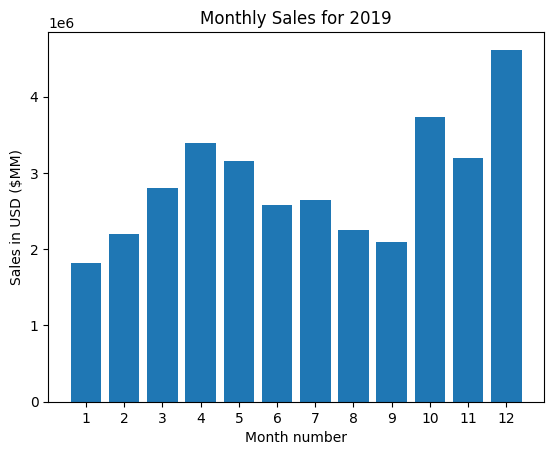

In [32]:
months = range(1,13)
print(months)

monthly_sales = all_data_df.groupby('Order_Date_Month')['Sales'].sum()

plt.bar(months, monthly_sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($MM)')
plt.xlabel('Month number')
plt.title('Monthly Sales for 2019')
plt.show()

##Question 2: What city sold the most product?

In [33]:
all_data_df.groupby(['Purchase City'])[['Quantity Ordered', 'Sales']].sum(numeric_only=True)

,Quantity Ordered,Sales
Purchase City,,
Atlanta,16602,2795498.58
Austin,11151,1819081.77
Boston,22524,3660315.12
Dallas,16728,2766260.45
Los Angeles,33288,5451570.81
New York City,27916,4662976.81
Portland,14051,2320337.62
San Francisco,50226,8259719.03
Seattle,16552,2747605.49


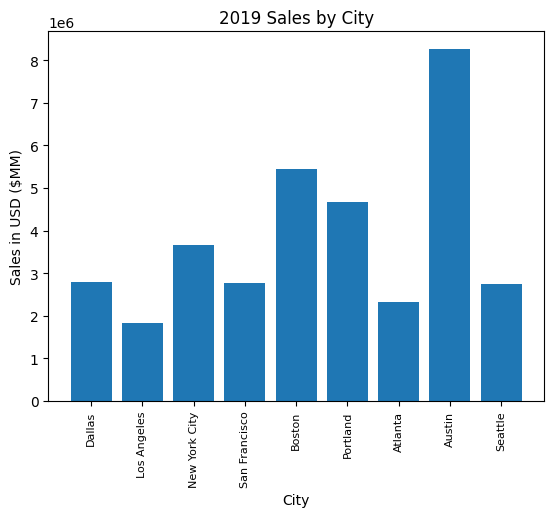

In [34]:
keys = all_data_df['Purchase City'].unique()

city_sales = all_data_df.groupby('Purchase City')['Sales'].sum()

plt.bar(keys, city_sales)
plt.xticks(keys, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($MM)')
plt.xlabel('City')
plt.title('2019 Sales by City')
plt.show()

##Question 3: What day of the month should we display advertisements to maximize likelihood of customer's buying product?

In [35]:
all_data_df.groupby(['Order_Date_Day'])[['Quantity Ordered', 'Sales']].sum(numeric_only=True)

,Quantity Ordered,Sales
Order_Date_Day,,
1,6826,1157648.96
2,6962,1137457.04
3,6534,1074432.90
4,6813,1163857.72
5,6816,1135284.73
6,6778,1151956.09
7,6779,1094796.63
8,6824,1107963.49
9,6836,1169250.43


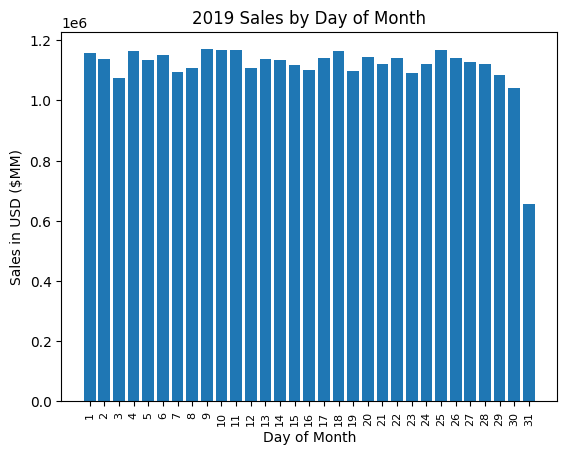

In [36]:
days_of_month = list(range(1, 32))

days_of_month_sales = all_data_df.groupby('Order_Date_Day')['Sales'].sum()

plt.bar(days_of_month, days_of_month_sales)
plt.xticks(days_of_month, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($MM)')
plt.xlabel('Day of Month')
plt.title('2019 Sales by Day of Month')
plt.show()

##Question 4: What product sold the most?

In [38]:
all_data_df.groupby(['Product'])[['Quantity Ordered', 'Sales']].sum(numeric_only=True)

,Quantity Ordered,Sales
Product,,
20in Monitor,4126,453818.74
27in 4K Gaming Monitor,6243,2434707.57
27in FHD Monitor,7547,1131974.53
34in Ultrawide Monitor,6199,2355558.01
AA Batteries (4-pack),27635,106118.40
AAA Batteries (4-pack),31012,92725.88
Apple Airpods Headphones,15657,2348550.00
Bose SoundSport Headphones,13454,1345265.46
Flatscreen TV,4818,1445400.00


In [ ]:
products = all_data_df['Product'].unique()

product_sales = all_data_df.groupby('Product')['Sales'].sum()

plt.bar(products, product_sales)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($MM)')
plt.xlabel('City')
plt.title('2019 Sales by Product')
plt.show()

